In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.19.0


In [2]:
print("\n=== Training DNN on MNIST ===")


=== Training DNN on MNIST ===


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess: flatten and normalize
x_train_dnn = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test_dnn = x_test.reshape(-1, 784).astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Build DNN model
dnn_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

dnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
dnn_history = dnn_model.fit(
    x_train_dnn, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# Evaluate
dnn_loss, dnn_acc = dnn_model.evaluate(x_test_dnn, y_test, verbose=0)
print(f"DNN Test Accuracy: {dnn_acc:.4f}")

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7889 - loss: 0.7181 - val_accuracy: 0.9635 - val_loss: 0.1337
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9427 - loss: 0.1935 - val_accuracy: 0.9715 - val_loss: 0.0992
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9595 - loss: 0.1314 - val_accuracy: 0.9750 - val_loss: 0.0857
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9682 - loss: 0.1029 - val_accuracy: 0.9762 - val_loss: 0.0767
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9722 - loss: 0.0889 - val_accuracy: 0.9795 - val_loss: 0.0715
DNN Test Accuracy: 0.9740


In [6]:
print("\n=== Training CNN on MNIST ===")

# Preprocess: add channel dimension
x_train_cnn = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Build CNN model
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


=== Training CNN on MNIST ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Train
cnn_history = cnn_model.fit(
    x_train_cnn, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# Evaluate
cnn_loss, cnn_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_acc:.4f}")

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.8489 - loss: 0.5377 - val_accuracy: 0.9780 - val_loss: 0.0725
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.9790 - loss: 0.0688 - val_accuracy: 0.9842 - val_loss: 0.0535
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9863 - loss: 0.0463 - val_accuracy: 0.9830 - val_loss: 0.0549
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9879 - loss: 0.0402 - val_accuracy: 0.9895 - val_loss: 0.0367
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9913 - loss: 0.0281 - val_accuracy: 0.9897 - val_loss: 0.0363
CNN Test Accuracy: 0.9898


In [8]:
# Save the trained CNN model
cnn_model.save("mnist_cnn.h5")
print("Saved CNN model to mnist_cnn.h5")


Saved CNN model to mnist_cnn.h5


In [9]:
from tensorflow import keras

model = keras.models.load_model("mnist_cnn.h5")
print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
import numpy as np    #not using
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_digit_image(path):
    # Load as grayscale and resize to 28x28
    img = load_img(path, color_mode='grayscale', target_size=(28, 28))

    # Convert to numpy array (28, 28, 1)
    img_array = img_to_array(img)

    # Normalize values to 0–1
    img_array = img_array.astype('float32') / 255.0

    return img_array


In [17]:
from PIL import Image
import numpy as np

def preprocess_digit_image(path, thresh=200, pad=10):
    # 1) Load original image as grayscale
    img = Image.open(path).convert("L")   # 'L' = 8-bit grayscale
    arr = np.array(img)

    # 2) Create a mask for dark pixels (pen strokes are darker than background)
    mask = arr < thresh  # tweak thresh (e.g. 180–220) if needed

    # If nothing detected, just fall back to simple resize
    if not mask.any():
        img = img.resize((28, 28))
        arr = np.array(img).astype("float32") / 255.0
        arr = 1.0 - arr  # invert
        return arr.reshape(28, 28, 1)

    # 3) Find bounding box of the digit
    ys, xs = np.where(mask)
    x_min, x_max = xs.min(), xs.max()
    y_min, y_max = ys.min(), ys.max()

    # 4) Add some padding around the digit
    x_min = max(x_min - pad, 0)
    y_min = max(y_min - pad, 0)
    x_max = min(x_max + pad, arr.shape[1] - 1)
    y_max = min(y_max + pad, arr.shape[0] - 1)

    # 5) Crop to this bounding box
    crop = img.crop((x_min, y_min, x_max + 1, y_max + 1))

    # 6) Resize to 28×28 like MNIST
    crop = crop.resize((28, 28))

    # 7) Convert to array, normalize, and invert so digit is bright on dark
    arr = np.array(crop).astype("float32") / 255.0
    arr = 1.0 - arr  # invert: background ~0, digit ~1

    # 8) Add channel dimension
    arr = arr.reshape(28, 28, 1)
    return arr



In [ ]:
from PIL import Image, ImageOps #not using yet
import numpy as np
import cv2

def preprocess_digit_image(path, pad=20):
    # Load image
    img = Image.open(path).convert('L')  # grayscale

    # Convert to numpy (0=black, 255=white)
    arr = np.array(img)

    # ---------------------------
    # 1. THRESHOLD → isolate digit stroke
    # ---------------------------
    _, thresh = cv2.threshold(arr, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # If digit is white on black → invert to black on white
    if np.mean(thresh) < 128:
        thresh = 255 - thresh

    # ---------------------------
    # 2. FIND BOUNDING BOX
    # ---------------------------
    ys, xs = np.where(thresh < 128)
    if len(xs) == 0 or len(ys) == 0:
        raise ValueError("Digit not detected")

    x_min, x_max = xs.min(), xs.max()
    y_min, y_max = ys.min(), ys.max()

    # Crop with padding
    x_min = max(0, x_min - pad)
    y_min = max(0, y_min - pad)
    x_max = min(thresh.shape[1], x_max + pad)
    y_max = min(thresh.shape[0], y_max + pad)

    crop = thresh[y_min:y_max, x_min:x_max]

    # ---------------------------
    # 3. RESIZE to 28x28
    # ---------------------------
    crop_img = Image.fromarray(crop)
    crop_img = crop_img.resize((28, 28), Image.LANCZOS)

    # Normalize and invert (MNIST is white digit on black)
    arr = np.array(crop_img).astype('float32') / 255.0
    arr = 1.0 - arr   # final inversion for MNIST style

    return arr.reshape(28, 28, 1)


In [18]:
def predict_digit(model, img_path):
    img_array = preprocess_digit_image(img_path)   # (28, 28, 1)
    img_array = np.expand_dims(img_array, axis=0)  # (1, 28, 28, 1)

    preds = model.predict(img_array)
    digit = np.argmax(preds[0])
    confidence = np.max(preds[0])
    return digit, confidence



In [19]:
digit, conf = predict_digit(model, "digit_recog.png")
print("Predicted digit:", digit)
print("Confidence:", conf)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted digit: 8
Confidence: 0.6939078


In [21]:
digit, conf = predict_digit(model, "digit_recogno9.png")
print("Predicted digit:", digit)
print("Confidence:", conf)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted digit: 1
Confidence: 0.16438176


In [23]:
digit, conf = predict_digit(model, "digitalrecogno1paint.png")
print("Predicted digit:", digit)
print("Confidence:", conf)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted digit: 1
Confidence: 0.76519954


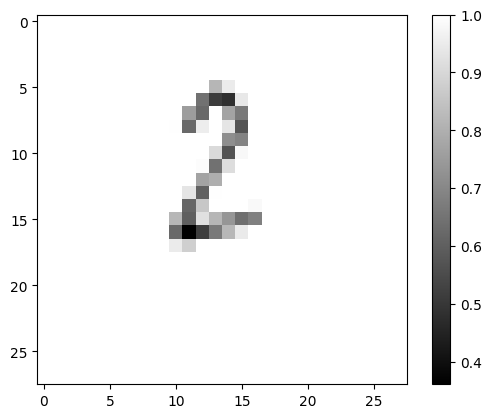

In [28]:
proc = preprocess_digit_image("no2blackbg.png")  # your current function
import matplotlib.pyplot as plt

plt.imshow(proc.squeeze(), cmap="gray")
plt.colorbar()
plt.show()


In [25]:
digit, conf = predict_digit(model, "No3written.png")
print("Predicted digit:", digit)
print("Confidence:", conf)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted digit: 3
Confidence: 0.6426052


In [26]:
digit, conf = predict_digit(model, "no2blackbg.png")
print("Predicted digit:", digit)
print("Confidence:", conf)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted digit: 0
Confidence: 0.54138076


In [27]:
digit, conf = predict_digit(model, "no5hw.png")
print("Predicted digit:", digit)
print("Confidence:", conf)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted digit: 5
Confidence: 0.67060804
